In [1]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 10,5

# Изменение во времени

/home/stepankutsenogy/MainWork/ltv_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


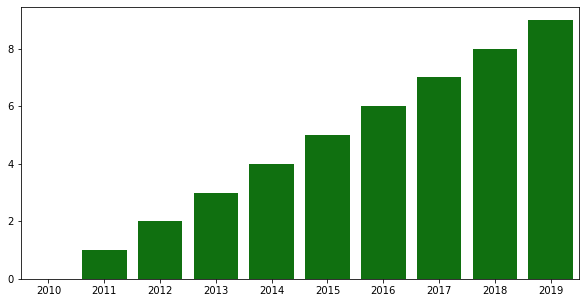

In [6]:
x = np.arange(0, 10)
y = np.arange(2010, 2020)

sns.barplot(y, x, color='g');
# plt.bar(y, x);

# Временные данные

In [36]:
# !pip install calmap

In [31]:
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

<AxesSubplot:>

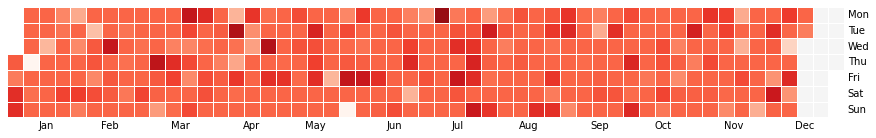

In [34]:
plt.figure(figsize=(15, 15))
calmap.yearplot(events, year=2015)

In [9]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Job A", Start='2022-01-01', Finish='2022-02-28'),
    dict(Task="Job B", Start='2022-03-05', Finish='2022-04-15'),
    dict(Task="Job C", Start='2022-02-20', Finish='2022-05-30'),
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

# Отклонения

/home/stepankutsenogy/MainWork/ltv_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



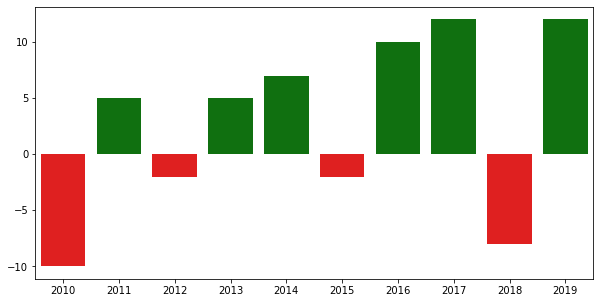

In [154]:
x = np.array([-10, 5, -2, 5, 7, -2, 10, 12, -8, 12])
y = np.arange(2010, 2020)
clrs = ['red' if (i < 0) else 'green' for i in x]
ax = sns.barplot(y, x, palette=clrs)

/home/stepankutsenogy/MainWork/ltv_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



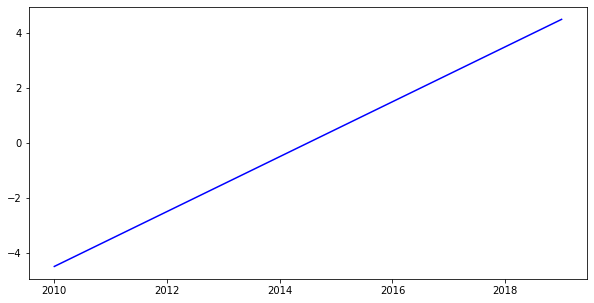

In [42]:
x = np.arange(0, 10)
y = np.arange(2010, 2020)
x = x - np.mean(x)

sns.lineplot(y, x, color='b');

# Корреляция

In [166]:
x = np.linspace(0, 10, 100)
y = -np.linspace(0, 10, 100) + np.random.normal(0, 1, 100)
z = np.random.normal(0, 10, 100)

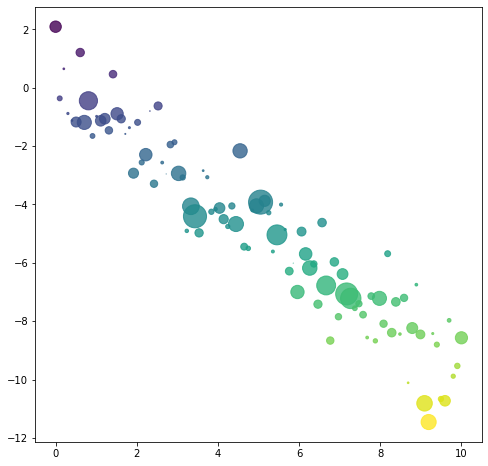

In [167]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=z ** 2, c=-y, alpha=0.8);

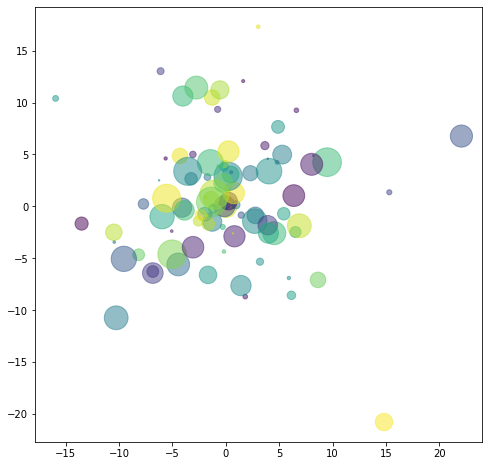

In [57]:
colors = np.random.rand(100)
area = (30 * np.random.rand(100))**2

plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=area, c=colors, alpha=0.5);

In [60]:
df = pd.read_csv('vg_sales.csv')

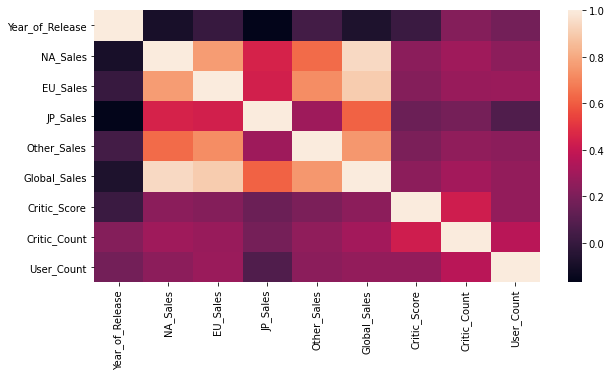

In [63]:
sns.heatmap(df.corr());

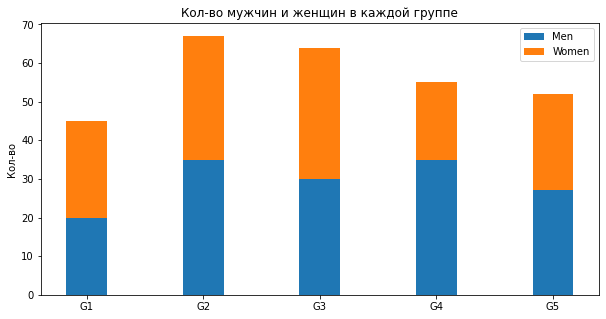

In [168]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Women')

ax.set_ylabel('Кол-во')
ax.set_title('Кол-во мужчин и женщин в каждой группе')
ax.legend()

plt.show()

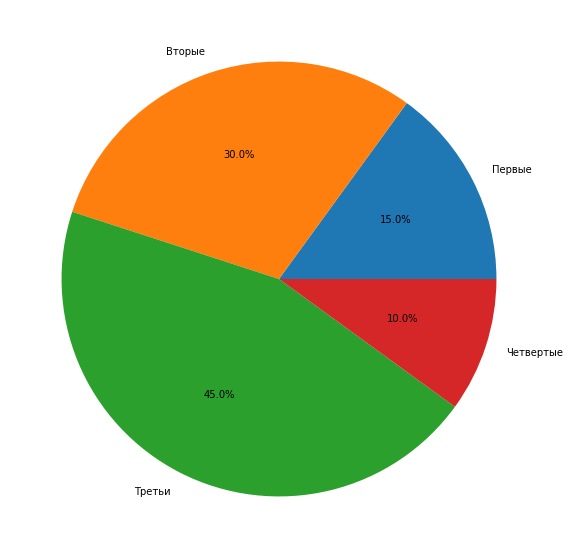

In [71]:
labels = ['Первые', 'Вторые', 'Третьи', 'Четвертые']
sizes = [15, 30, 45, 10]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

# Геоданные

In [72]:
!pip install folium

     |████████████████████████████████| 95 kB 862 kB/s eta 0:00:01


In [11]:
import folium

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [76]:
normal_distribution = np.random.normal(0, 1, 1000)

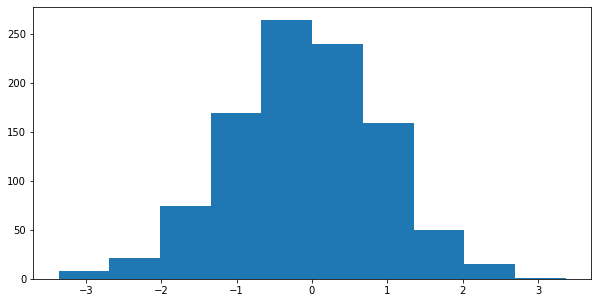

In [78]:
plt.hist(normal_distribution);

<Figure size 1080x1080 with 0 Axes>

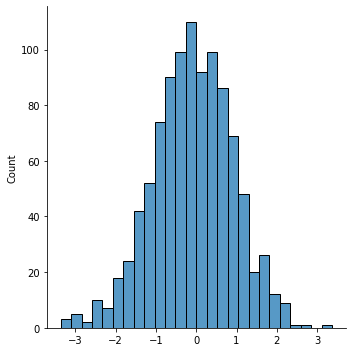

In [88]:
plt.figure(figsize=(15, 15))
sns.displot(normal_distribution)

In [117]:
young = np.random.normal(20, 7, 10000)
old = np.random.normal(45, 7, 5000)
common = np.array([*young, *old])
common = common[common > 16]

[Text(0.5, 0, 'Возраст'), Text(0, 0.5, 'Кол-во')]

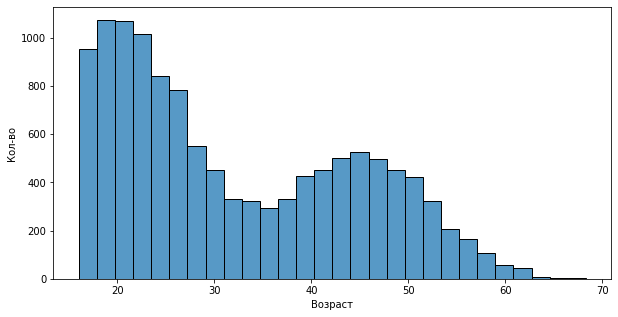

In [118]:
ax = sns.histplot(common)
ax.set(xlabel='Возраст', ylabel='Кол-во')

[Text(1, 0, 'first_data'), Text(2, 0, 'second_data')]

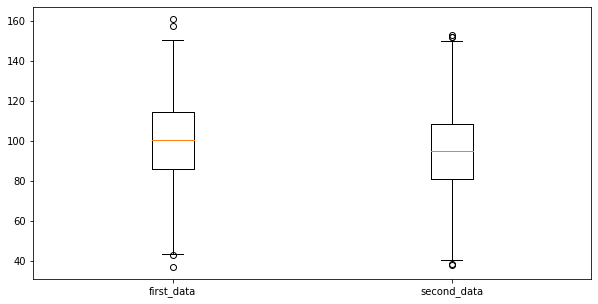

In [174]:
my_dict = {'first_data': np.random.normal(100, 20, 1000), 'second_data': np.random.normal(95, 20, 1000)}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())